<a href="https://colab.research.google.com/github/serjduvk/Homework/blob/master/%22%D0%91%D0%BE%D0%BB%D1%8C%D1%88%D0%BE%D0%B5_%D0%94%D0%97_2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Большое домашнее задание 2. Участие в соревнованиях на Kaggle. Работа с нерепрезентативными данными.
</b></h2>

ДЗ в колабе: https://colab.research.google.com/drive/18Hi97eESCrXYht-7SIoj_19pwcZhl17Y?usp=sharing

В этом домашнем задании нам нужно применить в реальном соревновании накопленные знания по машинному обучению и анализу данных!

- Нужно будет провести предобработку [данных с Kaggle](https://www.kaggle.com/sid321axn/thoraric-surgery). Затем нужно будет предсказать колонку DGN (диагноз). Это задача классификации. 
- Описание датасета (что значит признаки): https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data 
- Не забудьте провести анализ данных перед тем, как применять ML-модели! Вам нужно сначала понять, с чем Вы имеете дело, поискать зависимости в данных, понять природу этих зависимостей, и только после этого уже подбирать алгоритмы. Данные с подвохом! Внимательно смотрите на распределения признаков в каждом из классов!
- В качестве основы можно использовать наработки с занятий. Необходимо попробовать сделать аугментацию данных, т.к. данных очень мало, для обучения содержательных моделей их не хватит.
- Попробуйте kNN, логистическую регрессию, SVM. Поэкспериментируйте с добавлением композитных признаков (например, полиномиальных), выбором ядра (для SVM). Подберите гиперпараметры по кросс-валидации (GridSearchCV или RandomSearchCV, второй вариант предпочтительнее).  
- Достичь идеального качества Вам не удастся, да и гнаться за этим не стоит. Гораздо важнее провести вдумчивый анализ и показать, что Вы разобрались в теме.

**Правила:**

- **Дедлайн один:** 29 января 23:59. Решения, отправленные позже, проверяться не будут, кроме случаев наличия уважительной причины.



Решения, размещенные на каких-либо интернет-ресурсах, не принимаются.
 При написании кода придерживайтесь `pep8` и используйте `type hints`.

**После жесткого дедлайна задания не принимаются. Так как дальше будет работа только над проектом**

Информация о наборе данных:

Данные были ретроспективно собраны в Центре торакальной хирургии Вроцлава для пациентов, перенесших обширную резекцию легкого по поводу первичного рака легкого в 2007–2011 годах. Центр связан с отделением торакальной хирургии Медицинского университета Вроцлава и Нижнесилезским центром легочных заболеваний, Польша, а исследовательская база данных составляет часть Национального реестра рака легких, который ведется Институтом туберкулеза и легочных заболеваний. в Варшаве, Польша.


Информация об атрибутах:

1. DGN: диагностика - специфическая комбинация кодов МКБ-10 для первичных и вторичных, а также множественных опухолей, если таковые имеются (DGN3, DGN2, DGN4, DGN6, DGN5, DGN8, DGN1)
2. PRE4: принудительная жизненная емкость легких - FVC (числовой)
3. PRE5: объем выдоха в конце первой секунды форсированного выдоха - FEV1 (числовой)
4. PRE6: состояние производительности - шкала Зуброда (PRZ2, PRZ1, PRZ0)
5. PRE7: боль перед операцией (T, F)
6. PRE8: Кровохарканье перед операцией (T, F)
7. PRE9: Одышка перед операцией (T, F)
8. PRE10: Кашель перед операцией (T, F)
9. PRE11: Слабость перед операцией (T, F)
10. PRE14: T в клиническом TNM - размер исходной опухоли, от OC11 (наименьшая) до ОС14 (наибольшая) (ОС11, ОС14, ОС12, ОС13).
11. PRE17: СД 2 типа - сахарный диабет (T, F)
12. PRE19: ИМ до 6 месяцев (T, F)
13. PRE25: PAD - заболевания периферических артерий (T, F)
14. PRE30: Курение (T) , F)
15. PRE32: астма (T, F)
16. ВОЗРАСТ: возраст на момент операции (числовой)
17. Risk1Y: период выживания 1 год - (T) значение rue в случае смерти (T, F)

Распределение по классам: значение класса (Risk1Y) имеет двоичное значение.
Значение Risk1Y: Количество экземпляров:
T 70
N 400

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV # for tuning a models
from sklearn.model_selection import train_test_split #Split arrays or matrices into random train and test subsets
from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation

from sklearn.metrics import confusion_matrix # Compute confusion matrix to evaluate the accuracy of a classification
from sklearn.metrics import plot_confusion_matrix # Plot Confusion Matrix
from sklearn.metrics import classification_report # Build a text report showing the main classification metrics

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE # provides a set of method to perform over-sampling

# We want our plots to appear in the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/serjduvk/Homework/master/ThoraricSurgery.csv')
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [4]:
df.describe()

,id,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.281638,4.568702,62.534043
std,135.821574,0.871395,11.767857,8.706902
min,1.000000,1.440000,0.960000,21.000000
25%,118.250000,2.600000,1.960000,57.000000
50%,235.500000,3.160000,2.400000,62.000000
75%,352.750000,3.807500,3.080000,69.000000
max,470.000000,6.300000,86.300000,87.000000


In [5]:
#Меняем все 'T' на 1 и 'F' на 0 используя lambda function
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 
     'PRE30', 'PRE32', 'Risk1Yr']] = df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 
                                          'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 
                                          'Risk1Yr']].apply(lambda x: np.where(x == 'T', 1, 0)) 

In [6]:
df

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60,0
1,2,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51,0
2,3,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59,0
3,4,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54,0
4,5,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,0,0,0,1,0,OC13,0,0,0,1,0,63,0
466,467,DGN3,3.76,3.12,PRZ0,0,0,0,0,0,OC11,0,0,0,1,0,61,0
467,468,DGN3,3.04,2.08,PRZ1,0,0,0,1,0,OC13,0,0,0,0,0,52,0
468,469,DGN3,1.96,1.68,PRZ1,0,0,0,1,1,OC12,0,0,0,1,0,79,0


In [7]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

endf, encoders = number_encode_features(df) # Теперь endf содержит закодированные кат. признаки 
endf.head() 

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,3,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,4,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,5,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fa8bec630>,
      dtype=object)

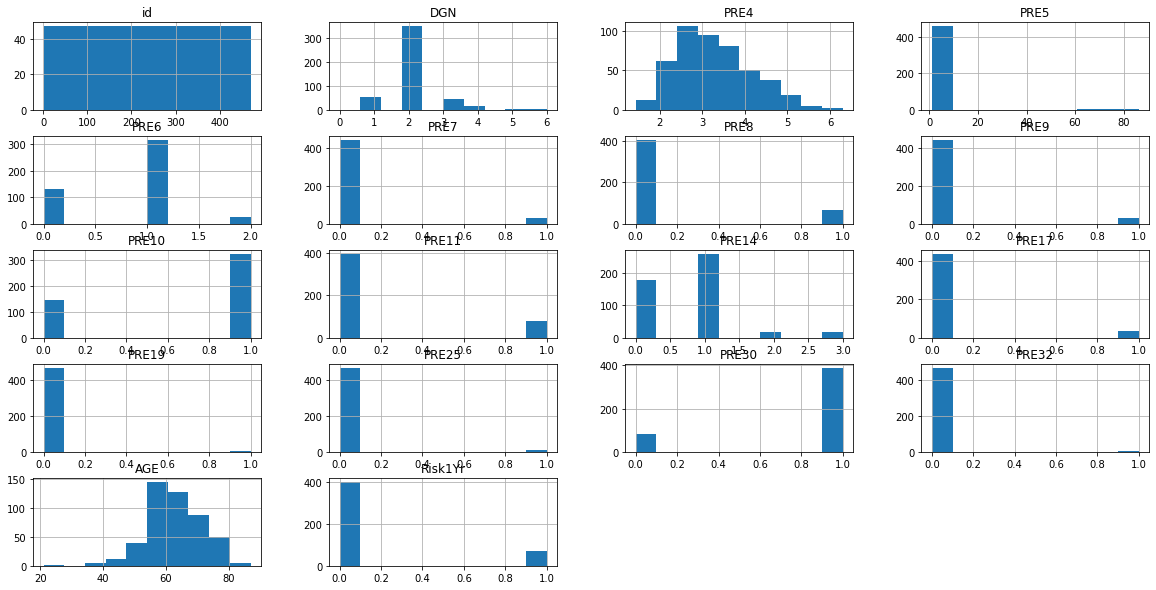

In [8]:
endf.hist(figsize=(20,10))

In [9]:
endf['Risk1Yr'].value_counts()

0    400
1     70
Name: Risk1Yr, dtype: int64

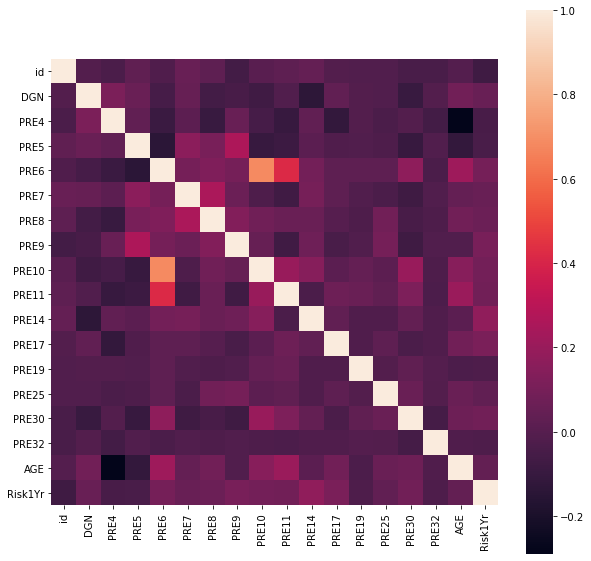

In [10]:
#построим матрицу кореляций
import seaborn as sns

plt.subplots(figsize=(10,10))
endf, encoders = number_encode_features(df)
sns.heatmap(endf.corr(), square=True)
plt.show()

In [11]:
endf

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,1,2.88,2.16,1,0,0,0,1,1,3,0,0,0,1,0,60,0
1,2,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
2,3,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
3,4,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
4,5,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,1,3.88,2.12,1,0,0,0,1,0,2,0,0,0,1,0,63,0
466,467,2,3.76,3.12,0,0,0,0,0,0,0,0,0,0,1,0,61,0
467,468,2,3.04,2.08,1,0,0,0,1,0,2,0,0,0,0,0,52,0
468,469,2,1.96,1.68,1,0,0,0,1,1,1,0,0,0,1,0,79,0


In [12]:
#выделим целевую переменную
X=endf.drop (['Risk1Yr'],axis=1).values
y=endf['Risk1Yr'].values

In [13]:
#определим размеры тестовой и обучающей выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99, stratify=y
)

In [14]:
#нормализуем данные
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
#данные в выборке несбалансированы
pd.Series(y).value_counts()

0    400
1     70
dtype: int64

In [16]:
#применим логистическую регресию на несбалансированных данных
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

clf = LogisticRegression(class_weight = 'balanced')

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.57      0.69       120
           1       0.16      0.48      0.24        21

    accuracy                           0.56       141
   macro avg       0.51      0.53      0.47       141
weighted avg       0.76      0.56      0.62       141



In [18]:
#для баласировки данных нарастим данные в меньшем классе с помощью аугментации методом Tomeklins
from imblearn.under_sampling import TomekLinks

augm = TomekLinks(sampling_strategy='majority')
X_train_augm, y_train_augm = augm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
pd.Series(y_train).value_counts(),   pd.Series(y_train_augm).value_counts()

(0    280
 1     49
 dtype: int64, 0    262
 1     49
 dtype: int64)

In [20]:
#применим логистическую регресию на аугментированных данных
clf = LogisticRegression(class_weight = 'balanced')

clf.fit(X_train_augm, y_train_augm)

predictions = clf.predict(X_test)

In [21]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.58      0.70       120
           1       0.17      0.48      0.25        21

    accuracy                           0.57       141
   macro avg       0.52      0.53      0.47       141
weighted avg       0.76      0.57      0.63       141



#### KNN

In [22]:
# Будем использовать модель k ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

Построим сетку, для перебора гиперпараметра для нахождения лучшего гиперпараметра KNN, пройдем 100 значений (от 1 до 100)

In [23]:
# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(1, 100, 100), dtype='int')} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=10)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96

Строим график зависимости качества от числа соседей

подсказка: результаты обучения хранятся в атрибуте cv_results_ объекта gs (grid search из библиотеки sklearn)

In [24]:
# Функция отрисовки графиков
def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

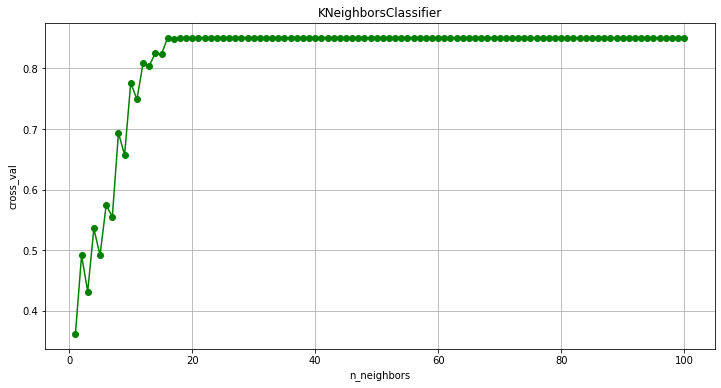

In [ ]:
# Строим график зависимости качества от числа соседей
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Отобразим лучший параметр (y gs есть атрибуты best_param, best_score)

In [25]:
# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 19}, 0.851063829787234)

Инициализируем отдельный классификатор с лучшим значением, найденным на предыдущего перебора

In [26]:
knn = KNeighborsClassifier(n_neighbors=10) 
# тренируем knn
clf_knn = knn.fit(X_train, y_train)

Получим предсказания от классификатора

In [27]:
y_knn = clf_knn.predict(X_test)


In [28]:
# ответы knn
y_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
# реальные ответы
y_test

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

Посмотрим на метрики качества через classification report

In [30]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       120
           1       0.00      0.00      0.00        21

    accuracy                           0.85       141
   macro avg       0.43      0.50      0.46       141
weighted avg       0.72      0.85      0.78       141



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVR

In [32]:
alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)

#Будем использовать ранее аугментированные данные
gs.fit(X_train_augm, y_train_augm)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 197 out of 200 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.7s finished


({'C': 0.5555555555555554, 'kernel': 'rbf'}, 0.842447516641065)

In [36]:
svm = SVC(C=0.55, kernel = 'rbf')

svm.fit(X_train_augm, y_train_augm)

SVC(C=0.55, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
preds = svm.predict(X_test)

In [38]:
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       120
           1       0.00      0.00      0.00        21

    accuracy                           0.85       141
   macro avg       0.43      0.50      0.46       141
weighted avg       0.72      0.85      0.78       141



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Логистическая

In [39]:
alg = LogisticRegression()

grid = {'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.array(np.logspace(-3, 2, num = 10), dtype='float')}

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.3s finished


({'C': 0.001, 'penalty': 'l2'}, 0.8510955710955711)

In [40]:
logreg = LogisticRegression(penalty='l2', C = 0.001)

logreg.fit(X_train, y_train)

preds = logreg.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       120
           1       0.00      0.00      0.00        21

    accuracy                           0.85       141
   macro avg       0.43      0.50      0.46       141
weighted avg       0.72      0.85      0.78       141



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
